In [2]:
pip install pandas numpy seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
df=pd.read_csv('exams.csv')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group D                some college      standard   
1      male        group D          associate's degree      standard   
2    female        group D                some college  free/reduced   
3      male        group B                some college  free/reduced   
4    female        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          59             70         

In [5]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  


In [6]:
print(df.describe()) #to check all the statistical analysis

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.000000      15.000000
25%      58.000000      61.000000      59.000000
50%      68.000000      70.500000      70.000000
75%      79.250000      80.000000      80.000000
max     100.000000     100.000000     100.000000


In [7]:
print(df.tail())

     gender race/ethnicity parental level of education     lunch  \
995    male        group C                some college  standard   
996    male        group C                some college  standard   
997  female        group A                 high school  standard   
998    male        group E                 high school  standard   
999    male        group D                 high school  standard   

    test preparation course  math score  reading score  writing score  
995                    none          77             77             71  
996                    none          80             66             66  
997               completed          67             86             86  
998                    none          80             72             62  
999                    none          58             47             45  


In [8]:
print(df.isnull())

     gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False          False  
1                      False       False         

In [9]:
print(df.isnull().sum()) #sum will bw zero as there is no null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [10]:
print(df.info()) #to get the full information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [11]:
print(df.shape)

(1000, 8)


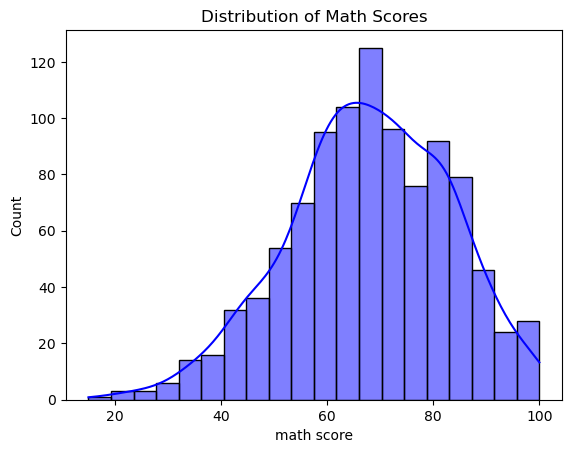

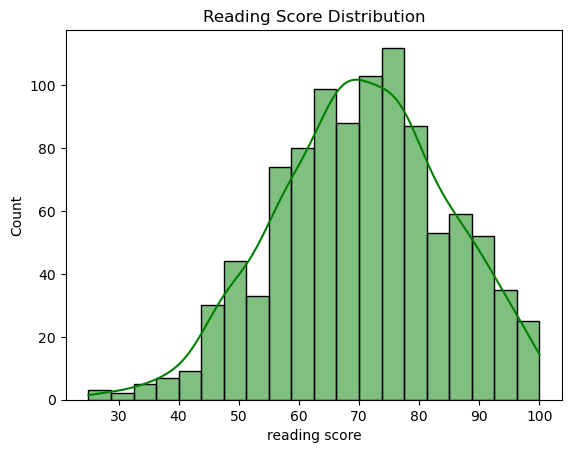

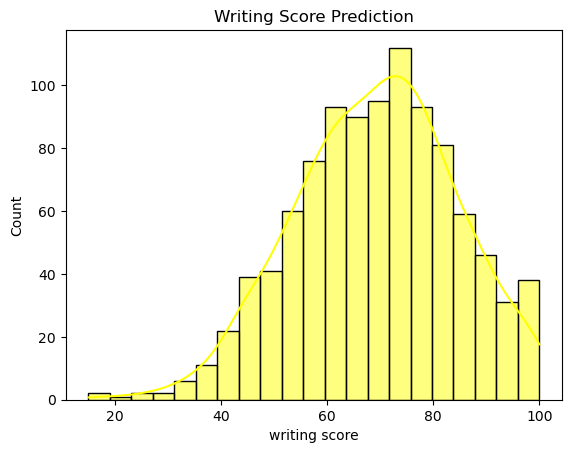

In [12]:
#Visualization using EDA graphs
import seaborn as sns
import matplotlib.pyplot as plt
#Histogram charts
sns.histplot(df['math score'], kde=True, color='Blue')
plt.title('Distribution of Math Scores')
plt.show()
sns.histplot(df['reading score'], kde=True, color='Green')
plt.title('Reading Score Distribution')
plt.show()
sns.histplot(df['writing score'], kde=True, color='Yellow')
plt.title('Writing Score Prediction')
plt.show()

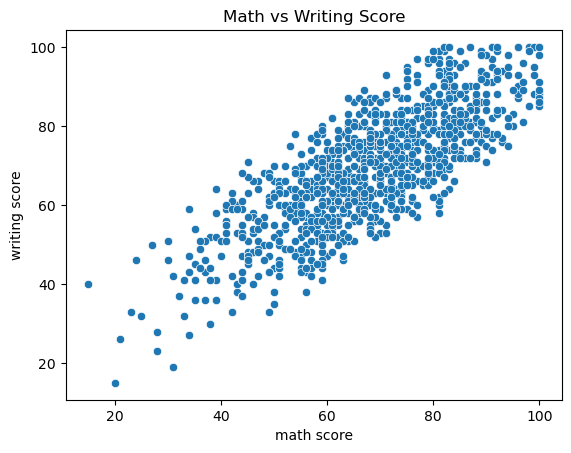

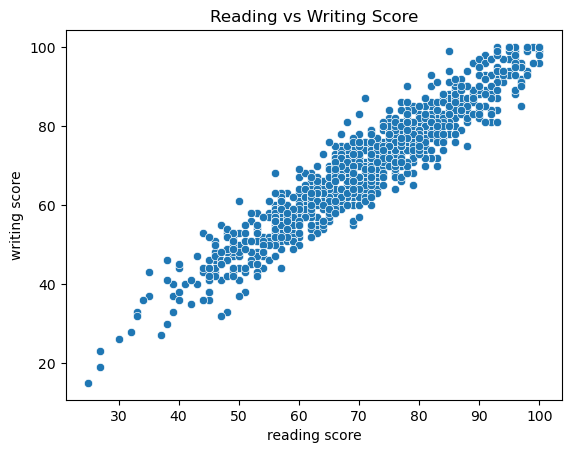

In [13]:
#Relationship bwtween Scores
sns.scatterplot(x='math score',y='writing score',data=df)
plt.title('Math vs Writing Score')
plt.show()

sns.scatterplot(x='reading score',y='writing score',data=df)
plt.title('Reading vs Writing Score')
plt.show()
#Math and writing relation does not have stronger relation
#Writing and reading relation has strong relation 

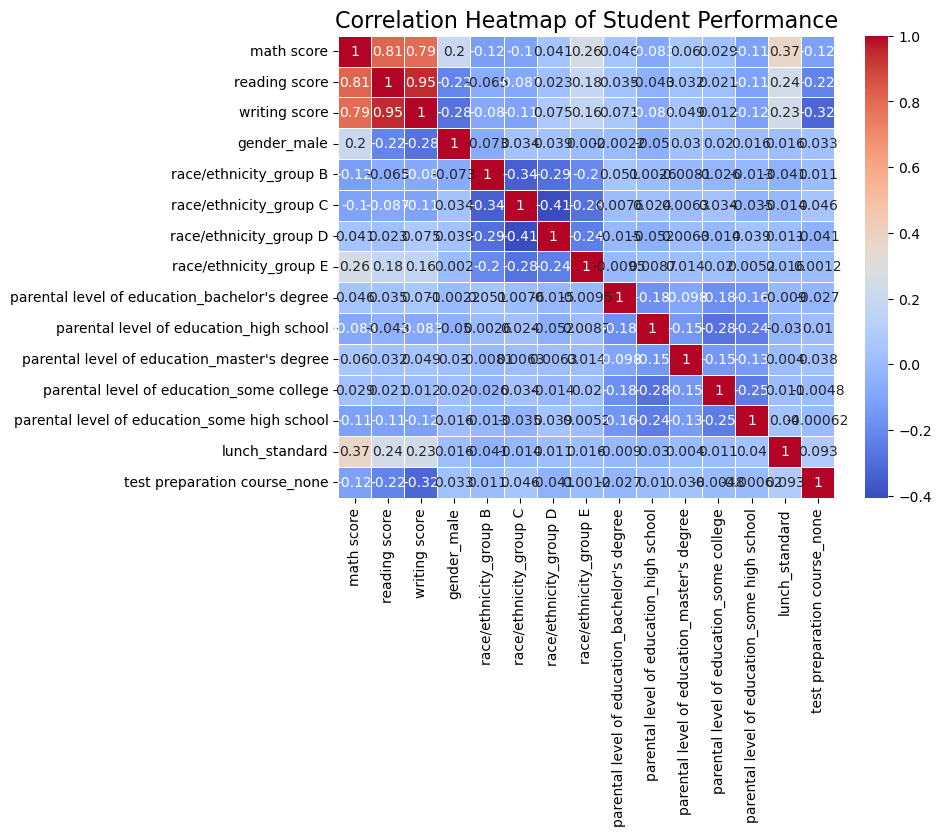

In [14]:
df_encoded=pd.get_dummies(df, drop_first=True)
corr_matrix=df_encoded.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Student Performance',fontsize=16)
plt.show()
plt.savefig('images/heatmap.png')
plt.close()         

In [16]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x=df[['math score','reading score']]
y=df['writing score']
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error", mse)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('R2 Score:',r2)
joblib.dump(model, 'models/linear_regression_model.pkl')

Mean Squared Error 19.220296333430948
R2 Score: 0.899074268360476


['models/linear_regression_model.pkl']

D:\Users\varti\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 3.45613167274567
Root Mean Squared Error: 4.384095839900281


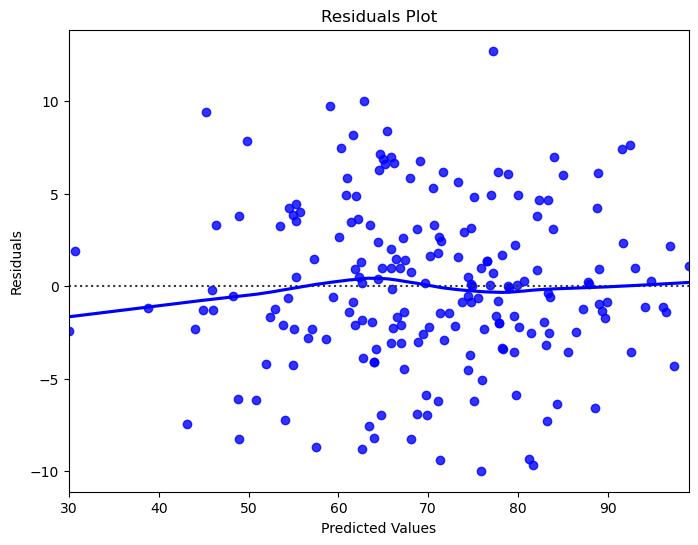

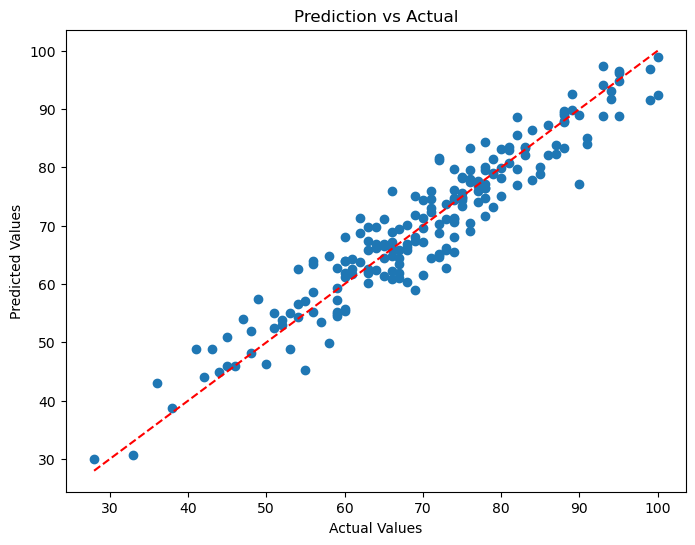

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
